In [1]:
#!pip install pipreqs

#!pipreqs .

In [2]:
from utility import *
import warnings
warnings.filterwarnings('ignore') 

In [3]:
import pandas as pd 
import numpy as np

train = pd.read_csv('datasets\\sds\\train_04.csv')
test = pd.read_csv('datasets\\sds\\test_04.csv')
train.head()

,text,neuro_bin,extra_bin,off_bin,ver_bin,gew_bin,labels
0,Durch eine Freundin von mir. Ich habe sehr gel...,1,1,1,1,0,"(1, 1, 1, 1, 0)"
1,Durch einen Schulausflug zur FAU in Nürnberg. ...,1,0,0,0,0,"(1, 0, 0, 0, 0)"
2,Ich bin hier einfach reingelaufen. An einem Ab...,0,1,1,1,0,"(0, 1, 1, 1, 0)"
3,"Email von einer Kollegin. Gestern, gemeinsam m...",0,1,1,0,0,"(0, 1, 1, 0, 0)"
4,Über Arbeitskollegen. Mir hat letztens jemand ...,1,0,0,1,1,"(1, 0, 0, 1, 1)"


In [4]:
y_train = np.where(train.extra_bin.values == 1, 1, 0)
y_test = np.where(test.extra_bin.values == 1, 1, 0)
print(y_train)
#Best Parameters : {'alpha': 1, 'l1_ratio': 0.15, 'penalty': 'l2'}

[1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1
 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1]


In [5]:
from featurization import *
from featurization_fastText_xlmr_sentiment import *
from featurization_pymagnitude_xlmr_sentiment import *

print("\n\n---- Getting Pymagnitude embeddings with german sentiment model ----")
train_features, test_features, feature_names = featurize(train, test, 'tfidf_glove')
print("\n\n---- Getting Fasttext embeddings with xlmr sentiment model ----")
train_features_ft_xlmr, test_features_ft_xlmr, feature_names_ft_xlmr = featurization_fastText_xlmr_sentiment(train, test, 'tfidf_glove')
print("\n\n---- Getting pymagnitude embeddings with xlmr sentiment model ----")
train_features_pm_xlmr, test_features_pm_xlmr, feature_names_pm_xlmr = featurization_pymagnitude_xlmr_sentiment(train, test, 'tfidf_glove')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!




---- Getting Pymagnitude embeddings with german sentiment model ----
Emoji re....
Num dots....
Punctuation....
Sentiment Scores....
Olverguhr German Sentiment Model took --- 22.10669255256653 seconds ---
Text Features....
Pymagnitude.....
Pymagnitude model load took --- 0.0019843578338623047 seconds ---


  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Pymagnitude Framework took --- 6.422696113586426 seconds ---
DONE!


---- Getting Fasttext embeddings with xlmr sentiment model ----
Emoji re....
Num dots....
Punctuation....
Sentiment Scores....
XLMR Sentiment Model took --- 18.900553703308105 seconds ---
Text Features....
FastText.....


fastText model load time took --- 9.555427312850952 seconds ---
Getting fasttext embeddings


  0%|          | 0/56 [00:00<?, ?it/s]

Getting fasttext embeddings


  0%|          | 0/24 [00:00<?, ?it/s]

fastText Framework took --- 0.16219115257263184 seconds ---
DONE!


---- Getting pymagnitude embeddings with xlmr sentiment model ----
Emoji re....
Num dots....
Punctuation....
Sentiment Scores....
XLMR Sentiment Model took --- 20.39103078842163 seconds ---
Text Features....
Pymagnitude.....
Pymagnitude model load took --- 0.004463911056518555 seconds ---


  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Pymagnitude Framework took --- 9.91403317451477 seconds ---
--- Normalized-features:
[[0.62882921 0.57895593 0.49701685 ... 0.54537616 0.57900959 0.38768693]
 [0.50755797 0.20770079 0.6208735  ... 0.37141341 0.57197655 0.36902082]
 [0.52357246 0.71562488 0.56267328 ... 0.64947906 0.71248297 0.10302208]
 ...
 [0.         0.59411483 0.57789967 ... 0.         0.97384943 0.24835512]
 [0.41829611 0.58404286 0.24840145 ... 0.49984046 0.31019643 0.        ]
 [0.5869989  0.42290812 0.64402693 ... 0.58942267 0.54180446 0.56389707]]
DONE!


# K Best

In [6]:
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt

def run_k_best_selector(train_features, test_features, y_train, y_test, feature_names, kstart = 80):  
    # start with 80 as a reasonable estimation
    selector = SelectKBest(k=kstart)
    train_features_selected = selector.fit_transform(train_features, y_train)
    test_features_selected = selector.transform(test_features)
    run_log_reg(train_features_selected, test_features_selected, y_train, y_test, alpha=1, l1_ratio=0.15, penalty='l2')
    
    # Lets run a for loop to select the value of K that optimizes F1
    f1_scores = []

    for k in tqdm_notebook(range(1, train_features.shape[1])):
        selector = SelectKBest(k = k)
        train_features_selected = selector.fit_transform(train_features, y_train)
        test_features_selected = selector.transform(test_features)
        f1_scores.append(run_log_reg(train_features_selected, test_features_selected, y_train, y_test, alpha = 1e-2, return_f1 = True, verbose = 0))
    f1_scores = np.array(f1_scores)    
    
    # Now let's plot the F1 scores:
    %matplotlib inline
    
    x = list(range(1, train_features.shape[1]))
    plt.plot(x, f1_scores)
    plt.xlabel('Number of Features')
    plt.ylabel('F1 Scores')
    plt.title('F1 Scores vs Num Features')
    plt.grid()
    plt.show()
    
    kcalc = np.argmax(f1_scores) + 1
    print("K calculated: " + str(kcalc))
    
    selector = SelectKBest(k = kcalc)
    train_features_selected = selector.fit_transform(train_features, y_train)
    test_features_selected = selector.transform(test_features)
    run_log_reg(train_features_selected, test_features_selected, y_train, y_test, alpha = 1,  l1_ratio=0.15, penalty='l2')
    
    # we can use get_support() to find out exactly which features were selected
    np.array(feature_names)[selector.get_support()]

## Pymagnitude vectors and german sentiment

F1: 0.625 | Pr: 0.500 | Re: 1.000 | AUC: 0.587 | Accuracy: 0.500 



  0%|          | 0/308 [00:00<?, ?it/s]

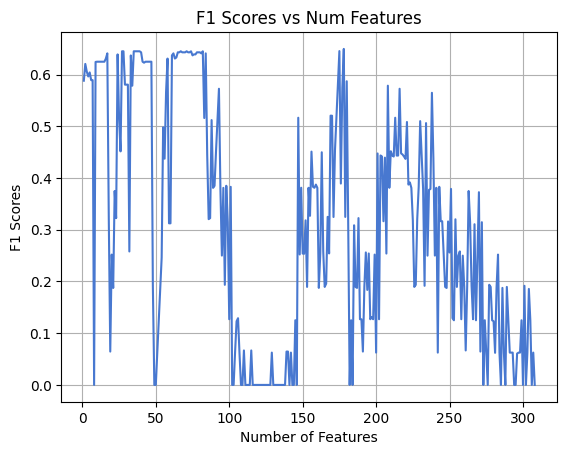

K calculated: 178
F1: 0.641 | Pr: 0.519 | Re: 1.000 | AUC: 0.580 | Accuracy: 0.533 



In [7]:
run_k_best_selector(train_features_ft_xlmr, test_features_ft_xlmr, y_train, y_test, feature_names)

## fasttext vectors and xlmr sentiment

F1: 0.000 | Pr: 0.000 | Re: 0.000 | AUC: 0.532 | Accuracy: 0.500 



  0%|          | 0/308 [00:00<?, ?it/s]

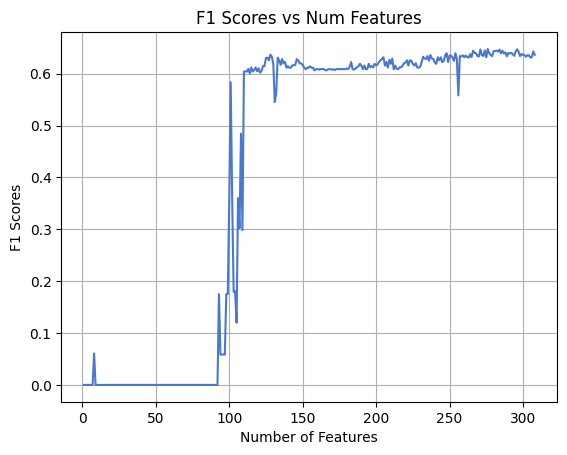

K calculated: 276
F1: 0.000 | Pr: 0.000 | Re: 0.000 | AUC: 0.612 | Accuracy: 0.496 



In [8]:
run_k_best_selector(train_features, test_features, y_train, y_test, feature_names_ft_xlmr)

# Pymagnitude vectors and xlmr sentiment

F1: 0.000 | Pr: 0.000 | Re: 0.000 | AUC: 0.608 | Accuracy: 0.504 



  0%|          | 0/308 [00:00<?, ?it/s]

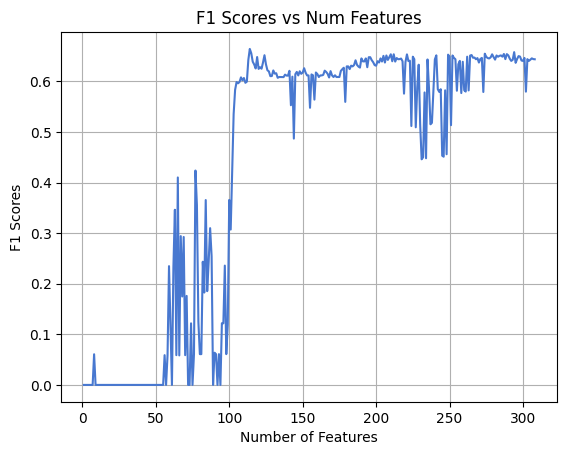

K calculated: 114
F1: 0.000 | Pr: 0.000 | Re: 0.000 | AUC: 0.610 | Accuracy: 0.500 



In [9]:
run_k_best_selector(train_features_pm_xlmr, test_features_pm_xlmr, y_train, y_test, feature_names_pm_xlmr)

# Select Percentile

In [10]:
from sklearn.feature_selection import SelectPercentile

def run_percentile_selector(train_features, test_features, y_train, y_test, feature_names):  
    f1_scores = []

    for percentage in tqdm_notebook(range(1, 101)):
        selector = SelectPercentile(percentile = percentage)
        train_features_selected = selector.fit_transform(train_features, y_train)
        test_features_selected = selector.transform(test_features)
        f1_scores.append(run_log_reg(train_features_selected, test_features_selected, y_train, y_test, alpha = 1e-2, return_f1 = True, verbose = 0))
    f1_scores = np.array(f1_scores)
    
    %matplotlib inline

    x = list(range(1, 101))
    plt.plot(x, f1_scores)
    plt.xlabel('Percentage of Features')
    plt.ylabel('F1 Scores')
    plt.title('F1 Scores vs Num Features')
    plt.grid()
    plt.show()
    
    percentile = np.argmax(f1_scores) + 1
    print("percentile: " + str(percentile))
    
    selector = SelectPercentile(percentile = percentile)
    train_features_selected = selector.fit_transform(train_features, y_train)
    test_features_selected = selector.transform(test_features)
    run_log_reg(train_features_selected, test_features_selected, y_train, y_test, alpha = 1e-2)

## Pymagnitude and German sentiment

  0%|          | 0/100 [00:00<?, ?it/s]

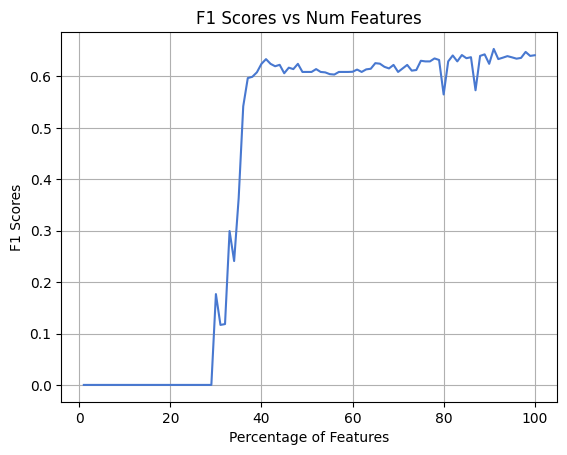

percentile: 91
F1: 0.642 | Pr: 0.601 | Re: 0.836 | AUC: 0.648 | Accuracy: 0.621 



In [11]:
run_percentile_selector(train_features, test_features, y_train, y_test, feature_names)

## Fasttext embeddings and xlmr sentiment

  0%|          | 0/100 [00:00<?, ?it/s]

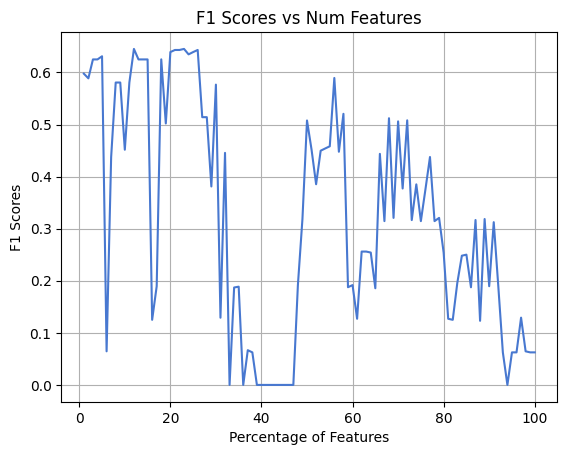

percentile: 12
F1: 0.645 | Pr: 0.524 | Re: 1.000 | AUC: 0.534 | Accuracy: 0.542 



In [12]:
run_percentile_selector(train_features_ft_xlmr, test_features_ft_xlmr, y_train, y_test, feature_names)

## Pymagnitude embeddings and xlmr sentiment

  0%|          | 0/100 [00:00<?, ?it/s]

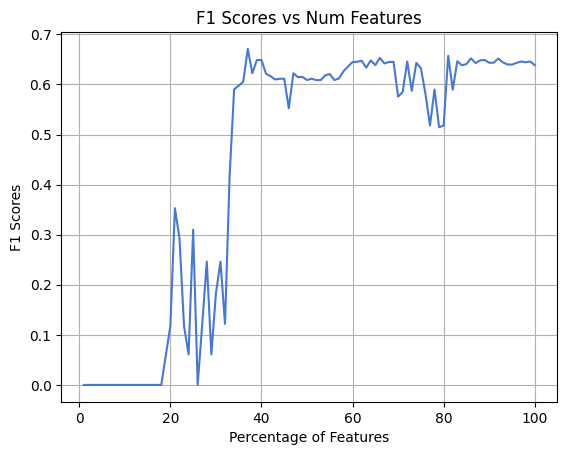

percentile: 37
F1: 0.667 | Pr: 0.728 | Re: 0.727 | AUC: 0.654 | Accuracy: 0.708 



In [13]:
run_percentile_selector(train_features_pm_xlmr, test_features_pm_xlmr, y_train, y_test, feature_names_pm_xlmr)

# RFECV (Recursive Feature Elimination)


RFE is a backward feature selection technique that uses an estimator to calculate the feature importance at each stage. The word recursive in the name implies that the technique recursively removes features that are not important for classifiction.

We'll use the CV variant which uses cross-validation inside each loop to determine how many features to remove in each loop. RFECV needs an estimator which has the feature_importances_ attribute so we'll use SGDClassifier with log loss.


In [14]:
# Since we have a hold out Test set that we would like to use - Let's create a `PredefinedSplit`
from sklearn.model_selection import PredefinedSplit
from sklearn.feature_selection import RFECV

def run_rf_elimination(train_features, test_features, y_train, y_test, feature_names):
    X = sparse.vstack((train_features, test_features))
    test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]     # We need to label -1 for the train set and 0 for test set
    y = np.concatenate([y_train, y_test])
    ps = PredefinedSplit(test_fold)
    
    log_reg = SGDClassifier(loss = 'log', alpha = 1e-3)
    selector = RFECV(log_reg, scoring = 'f1', n_jobs = -1, cv = ps, verbose = 1)
    selector.fit(X, y)
    
    # Now lets select the best features and check the performance
    train_features_selected = selector.transform(train_features)
    test_features_selected = selector.transform(test_features)

    run_log_reg(train_features_selected, test_features_selected, y_train, y_test, alpha = 1e-1)

## Pymagnitude and German sentiment

In [15]:
run_rf_elimination(train_features, test_features, y_train, y_test, feature_names)

Fitting estimator with 309 features.
Fitting estimator with 308 features.
Fitting estimator with 307 features.
Fitting estimator with 306 features.
Fitting estimator with 305 features.
Fitting estimator with 304 features.
Fitting estimator with 303 features.
Fitting estimator with 302 features.
Fitting estimator with 301 features.
Fitting estimator with 300 features.
Fitting estimator with 299 features.
Fitting estimator with 298 features.
Fitting estimator with 297 features.
Fitting estimator with 296 features.
Fitting estimator with 295 features.
Fitting estimator with 294 features.
Fitting estimator with 293 features.
Fitting estimator with 292 features.
Fitting estimator with 291 features.
Fitting estimator with 290 features.
Fitting estimator with 289 features.
Fitting estimator with 288 features.
Fitting estimator with 287 features.
Fitting estimator with 286 features.
Fitting estimator with 285 features.
Fitting estimator with 284 features.
Fitting estimator with 283 features.
F

## Fasttext embeddings and xlmr sentiment

In [16]:
run_rf_elimination(train_features_ft_xlmr, test_features_ft_xlmr, y_train, y_test, feature_names)

Fitting estimator with 309 features.
Fitting estimator with 308 features.
Fitting estimator with 307 features.
Fitting estimator with 306 features.
Fitting estimator with 305 features.
Fitting estimator with 304 features.
Fitting estimator with 303 features.
Fitting estimator with 302 features.
Fitting estimator with 301 features.
Fitting estimator with 300 features.
Fitting estimator with 299 features.
Fitting estimator with 298 features.
Fitting estimator with 297 features.
Fitting estimator with 296 features.
Fitting estimator with 295 features.
Fitting estimator with 294 features.
Fitting estimator with 293 features.
Fitting estimator with 292 features.
Fitting estimator with 291 features.
Fitting estimator with 290 features.
Fitting estimator with 289 features.
Fitting estimator with 288 features.
Fitting estimator with 287 features.
Fitting estimator with 286 features.
Fitting estimator with 285 features.
Fitting estimator with 284 features.
Fitting estimator with 283 features.
F

## Pymagnitude embeddings and xlmr sentiment

In [17]:
run_rf_elimination(train_features_pm_xlmr, test_features_pm_xlmr, y_train, y_test, feature_names_pm_xlmr)

Fitting estimator with 309 features.
Fitting estimator with 308 features.
Fitting estimator with 307 features.
Fitting estimator with 306 features.
Fitting estimator with 305 features.
Fitting estimator with 304 features.
Fitting estimator with 303 features.
Fitting estimator with 302 features.
Fitting estimator with 301 features.
Fitting estimator with 300 features.
Fitting estimator with 299 features.
Fitting estimator with 298 features.
Fitting estimator with 297 features.
Fitting estimator with 296 features.
Fitting estimator with 295 features.
Fitting estimator with 294 features.
Fitting estimator with 293 features.
Fitting estimator with 292 features.
Fitting estimator with 291 features.
Fitting estimator with 290 features.
Fitting estimator with 289 features.
Fitting estimator with 288 features.
Fitting estimator with 287 features.
Fitting estimator with 286 features.
Fitting estimator with 285 features.
Fitting estimator with 284 features.
Fitting estimator with 283 features.
F

### SFS (Sequential Forward Selection)
Finally, let's try SFS - which does the same thing as RFE instead adds features sequentially. SFS starts with 0 features and adds features 1-by-1 in each loop in a greedy manner. One small difference is that SFS solely uses the feature sets performance on the CV set as a metric for selecting the best features, unlike RFE which used model weights (feature_importances_)

In [18]:
# Note: MLxtend provides the SFS Implementation
from mlxtend.feature_selection import SequentialFeatureSelector

def run_sf_selection(train_features, test_features, y_train, y_test, feature_names):
    X = sparse.vstack((train_features, test_features))
    test_fold = [-1 for _ in range(train_features.shape[0])] + [0 for _ in range(test_features.shape[0])]     # We need to label -1 for the train set and 0 for test set
    y = np.concatenate([y_train, y_test])
    ps = PredefinedSplit(test_fold)
    
    log_reg = SGDClassifier(loss = 'log', alpha = 1e-2)

    selector = SequentialFeatureSelector(log_reg, k_features = 'best', floating = True, cv = ps, scoring = 'f1', verbose = 1, n_jobs = -1) # k_features = 'best' returns the best subset of features
    selector.fit(X.tocsr(), y)
    
    # Now lets select the best features and check the performance
    train_features_selected = selector.transform(train_features.tocsr())
    test_features_selected = selector.transform(test_features.tocsr())

    run_log_reg(train_features_selected, test_features_selected, y_train, y_test, alpha = 1e-2)
    
    log_reg.fit(train_features_selected, y_train)
    y_pred_prob = (log_reg.predict_proba(test_features_selected)[:,1])

    print_model_metrics(y_test, y_pred_prob, confusion = True)
    
    return selector, log_reg

## Pymagnitude with german sentiment

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 309 out of 309 | elapsed:    0.9s finished
Features: 1/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 308 out of 308 | elapsed:    0.2s finished
Features: 2/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 307 out of 307 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 3/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: D

F1: 0.901 | Pr: 0.912 | Re: 0.991 | AUC: 0.985 | Accuracy: 0.908 

F1: 0.900 | Pr: 1.000 | Re: 0.909 | AUC: 0.972 | Accuracy: 0.917 



(SequentialFeatureSelector(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                           estimator=SGDClassifier(alpha=0.01, loss='log'),
                           floating=True, k_features=(1, 309), n_jobs=-1,
                           scoring='f1', verbose=1),
 SGDClassifier(alpha=0.01, loss='log'))

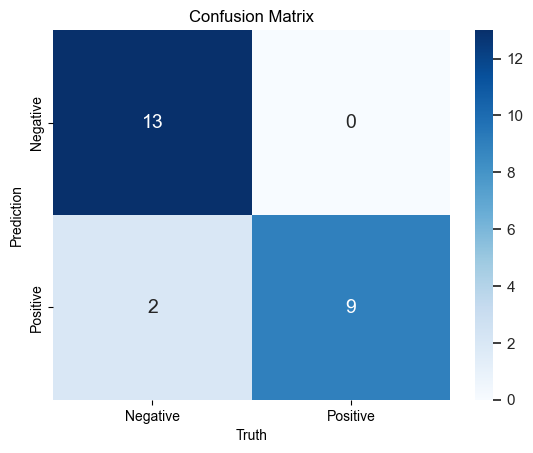

In [19]:
run_sf_selection(train_features, test_features, y_train, y_test, feature_names)

## fasttext with xlmr sentiment

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 309 out of 309 | elapsed:    0.5s finished
Features: 1/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 308 out of 308 | elapsed:    0.6s finished
Features: 2/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 307 out of 307 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 3/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: D

F1: 0.238 | Pr: 0.224 | Re: 0.291 | AUC: 0.802 | Accuracy: 0.613 

F1: 0.000 | Pr: 0.000 | Re: 0.000 | AUC: 0.790 | Accuracy: 0.542 



(SequentialFeatureSelector(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                           estimator=SGDClassifier(alpha=0.01, loss='log'),
                           floating=True, k_features=(1, 309), n_jobs=-1,
                           scoring='f1', verbose=1),
 SGDClassifier(alpha=0.01, loss='log'))

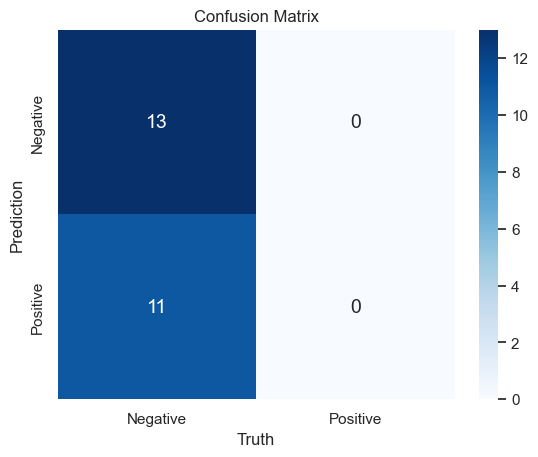

In [20]:
run_sf_selection(train_features_ft_xlmr, test_features_ft_xlmr, y_train, y_test, feature_names)

## Pymagnitude with xlmr sentiment

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 309 out of 309 | elapsed:    0.4s finished
Features: 1/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 308 out of 308 | elapsed:    0.6s finished
Features: 2/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 292 out of 307 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 307 out of 307 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 3/309[Parallel(n_jobs=-1

F1: 0.870 | Pr: 0.846 | Re: 1.000 | AUC: 0.927 | Accuracy: 0.875 

F1: 0.870 | Pr: 0.846 | Re: 1.000 | AUC: 0.923 | Accuracy: 0.875 



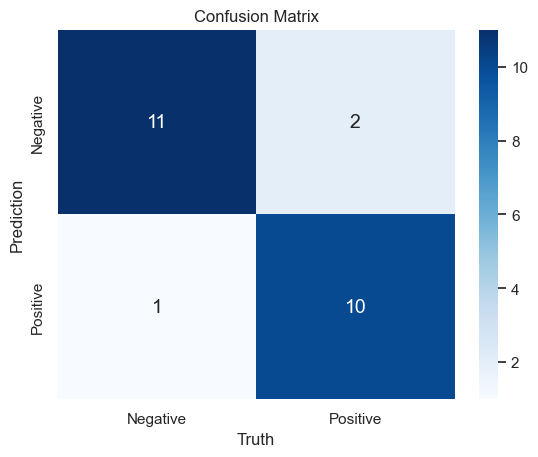

In [21]:
selector, logreg = run_sf_selection(train_features_pm_xlmr, test_features_pm_xlmr, y_train, y_test, feature_names_pm_xlmr)

## Save model

In [22]:
#import pickle
import joblib
#neuro_classifier = run_sf_selection(train_features_pm_xlmr, test_features_pm_xlmr, y_train, y_test, feature_names_pm_xlmr)
selector_file = 'extraversion_sf_selector.joblib'
log_reg_file = 'exraversion_classifier.joblib'
joblib.dump(selector, selector_file)
joblib.dump(logreg, log_reg_file)

['exraversion_classifier.joblib']

In [23]:
#with open("extra_logreg_classifier.pkl", "wb") as f:
#    pickle.dump(extra_classifier, f)